# New display `model_selection.ValidationCurveDisplay`

By default, 5-fold cross-validation is used.

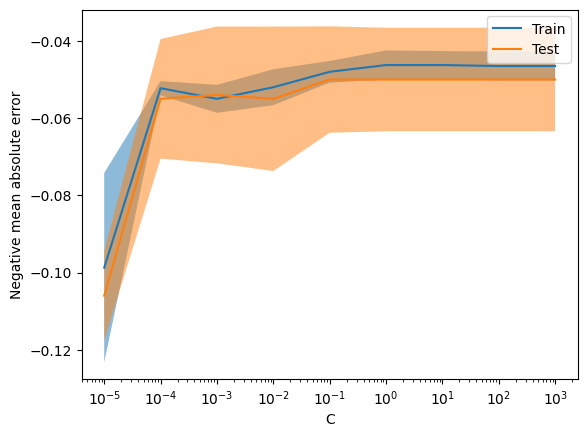

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ValidationCurveDisplay

X, y = make_classification(1000, 10, random_state=0)

_ = ValidationCurveDisplay.from_estimator(
    LogisticRegression(),
    X,
    y,
    param_name="C",
    param_range=np.geomspace(1e-5, 1e3, num=9),
    score_type="both",
    scoring="neg_mean_absolute_error",
)

## Balanced Accuracy

Balanced accuracy is defined as the average of recall obtained on each class.

In [13]:
from sklearn.metrics import balanced_accuracy_score
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1]
y_label = ['n', 'y', 'n', 'y', 'y', 'n']
balanced_accuracy_score(y_true, y_pred, adjusted=False)

0.625

In [20]:
import numpy as np

def recall_per_class(y_true, y_pred):
    unique_classes = set(y_true)
    recall_dict = {}
    
    for cls in unique_classes:
        true_positive = sum(np.logical_and(np.array(y_true) == cls, np.array(y_pred) == cls))
        actual_positive = sum(np.array(y_true) == cls)
        if actual_positive == 0:
            recall_dict[cls] = 0  # To handle cases where actual positive is zero
        else:
            recall_dict[cls] = true_positive / actual_positive
    
    return recall_dict

y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1]
y_label = ['n', 'y', 'n', 'y', 'y', 'n']

recall_classes = recall_per_class(y_label, y_pred)
print(recall_classes)

{'y': 0.0, 'n': 0.0}


/var/folders/k_/yz8rvp25185_js60dw8vhnj40000gn/T/ipykernel_10187/1924159290.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  true_positive = sum(np.logical_and(np.array(y_true) == cls, np.array(y_pred) == cls))


In [21]:
1/2 * (recall_per_class(y_true, y_pred)[0] + recall_per_class(y_true, y_pred)[1])

0.625

In [49]:
resampled_accuracies

[]

<Figure size 500x500 with 0 Axes>

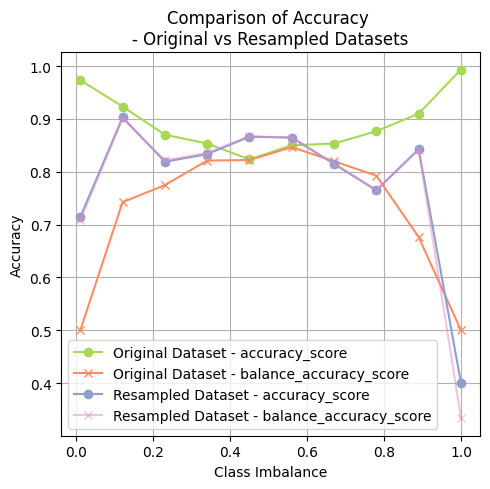

In [75]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# sample_weight

# Function to create imbalanced datasets
def create_imbalanced_dataset(class_imbalance):
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                               n_redundant=5, weights=class_imbalance, random_state=42)
    return X, y

# Function to balance the dataset using RandomUnderSampler
def balance_dataset(X, y):
    rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, y)
    return X_resampled, y_resampled

model = LogisticRegression(random_state=42)

# Generate imbalanced datasets with different class imbalances
class_imbalances = np.linspace(0.01, 1.0, 10)
original_accuracies = []
original_accuracies_balanced = []
resampled_accuracies = []
resampled_accuracies_balanced = []

for imbalance in class_imbalances:
    X, y = create_imbalanced_dataset({0: imbalance, 1: 1 - imbalance})

    # Compute balanced accuracy for original imbalanced datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    acc_original = accuracy_score(y_test, y_pred)
    balanced_acc_original = balanced_accuracy_score(y_test, y_pred)
    original_accuracies.append(acc_original)
    original_accuracies_balanced.append(balanced_acc_original)
    
    # Balance the datasets and compute accuracy
    X_balanced, y_balanced = balance_dataset(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    acc_resampled = accuracy_score(y_test, y_pred)
    acc_resampled_balanced = balanced_accuracy_score(y_test, y_pred)
    resampled_accuracies.append(acc_resampled)
    resampled_accuracies_balanced.append(acc_resampled_balanced)

# Plotting the results
labels = [f"{imbalance * 100}%" for imbalance in class_imbalances]
x = range(len(class_imbalances))

plt.figure(figsize=(5, 5))
colors = plt.get_cmap('Set2')
plt.figure(figsize=(5, 5))
plt.plot(class_imbalances, original_accuracies, marker='o', color=colors(4), label='Original Dataset - accuracy_score')
plt.plot(class_imbalances, original_accuracies_balanced, marker='x', color=colors(1), label='Original Dataset - balance_accuracy_score')
plt.plot(class_imbalances, resampled_accuracies, marker='o', color=colors(2), label='Resampled Dataset - accuracy_score')
plt.plot(
    class_imbalances, 
    resampled_accuracies_balanced, 
    marker='x', 
    color=colors(3), 
    alpha=0.5,
    label='Resampled Dataset - balance_accuracy_score')

plt.xlabel('Class Imbalance')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy \n- Original vs Resampled Datasets', fontweight='medium')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [130]:
from sklearn.datasets import make_classification
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Function to create imbalanced datasets
def create_imbalanced_dataset(class_imbalance):
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                               n_redundant=5, weights=class_imbalance, random_state=42)
    return X, y

# Generate imbalanced datasets with different class imbalances
class_imbalances = np.linspace(0.01, 1.0, 10)
original_accuracies_sample_w = []

for imbalance in class_imbalances:
    X, y = create_imbalanced_dataset({0: imbalance, 1: 1 - imbalance})

    # Compute average target variable rate for sample weights
    weight = np.mean(y)

    # Generate sample weights based on the average target variable rate
    grid_sample_w = np.where(y == 0, 1, weight)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit the model using logistic regression
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set and compute balanced accuracy with sample weights
    y_pred = model.predict(X_test)
    balanced_acc_sample_w = balanced_accuracy_score(y_test, y_pred, sample_weight=grid_sample_w[:len(y_test)])
    original_accuracies_sample_w.append(balanced_acc_sample_w)

# Displaying the computed balanced accuracy scores
for i, imbalance in enumerate(class_imbalances):
    print(f"Balanced Accuracy for {imbalance * 100:.2f}% imbalance: {original_accuracies_sample_w[i]:.4f}")

Balanced Accuracy for 1.00% imbalance: 0.5000
Balanced Accuracy for 12.00% imbalance: 0.7425
Balanced Accuracy for 23.00% imbalance: 0.7803
Balanced Accuracy for 34.00% imbalance: 0.8289
Balanced Accuracy for 45.00% imbalance: 0.8258
Balanced Accuracy for 56.00% imbalance: 0.8359
Balanced Accuracy for 67.00% imbalance: 0.8233
Balanced Accuracy for 78.00% imbalance: 0.8088
Balanced Accuracy for 89.00% imbalance: 0.6895
Balanced Accuracy for 100.00% imbalance: 0.5000


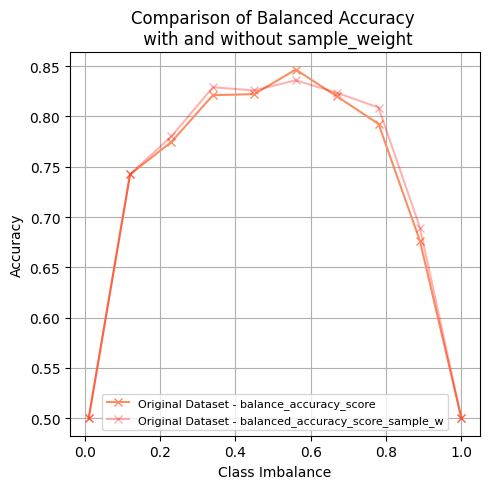

In [131]:
# Plotting the results
labels = [f"{imbalance * 100}%" for imbalance in class_imbalances]
x = range(len(class_imbalances))

colors = plt.get_cmap('Set2')
plt.figure(figsize=(5, 5))
# plt.plot(class_imbalances, original_accuracies, marker='o', color=colors(4), label='Original Dataset - accuracy_score')
plt.plot(class_imbalances, original_accuracies_balanced, marker='x', color=colors(1), label='Original Dataset - balance_accuracy_score')
# plt.plot(class_imbalances, resampled_accuracies, marker='o', color=colors(2), label='Resampled Dataset - accuracy_score')
# plt.plot(
#     class_imbalances, 
#     resampled_accuracies_balanced, 
#     marker='x', 
#     color=colors(3), 
#     alpha=0.5,
#     label='Resampled Dataset - balance_accuracy_score')
plt.plot(class_imbalances, original_accuracies_sample_w,
         marker='x', color='red', alpha=0.3, label='Original Dataset - balanced_accuracy_score_sample_w')


plt.xlabel('Class Imbalance')
plt.ylabel('Accuracy')
plt.title('Comparison of Balanced Accuracy \n with and without sample_weight', fontweight='medium')
plt.legend(fontsize=8)
plt.tight_layout()
plt.grid()
plt.show()

## Cross-validation

In [58]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [59]:
from sklearn import set_config
set_config(transform_output = "pandas")

In [60]:
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder

In [63]:
import pandas as pd
# # Fetch loan approval data (synthesized)
# url = (
#     "https://drive.google.com/file/d/1r6gGvL_s313ThGSU7ziZiuYr2G_yijaZ/view?usp=sharing"
# )
# file_id = url.split("/")[-2]
# dataset = pd.read_csv(f"https://drive.google.com/uc?id={file_id}")

In [64]:
# dataset.to_csv('loan_approval_synt.csv', index=False)
dataset = pd.read_csv('loan_approval_synt.csv', index_col=False)

In [65]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
target = lb.fit_transform(dataset['Loan_Status']).flatten()
data = dataset.drop(columns=['Loan_ID', 'Gender', 'Loan_Status'])

In [66]:
from sklearn.compose import make_column_selector as selector

# create selectors
categorical_columns_selector = selector(dtype_include=object)
numerical_columns_selector = selector(dtype_exclude=object)

# identify columns
categorical_columns = categorical_columns_selector(data)
numerical_columns = numerical_columns_selector(data)

# split the data
data_categorical = data[categorical_columns]
data_numerical = data[numerical_columns]

In [67]:
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
iterative_imputer = IterativeImputer(random_state=0)

## Pipeline vs. make_pipeline
M1. The Predictive Modeling Pipeline | M1. Visualizing scikit-learn pipelines in Jupyter




In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

# Preprocessing
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")

# # from Visualizing scikit-learn pipelines in Jupyter
# numerical_preprocessor = StandardScaler().set_output(transform="pandas")

numerical_preprocessor = Pipeline(
    steps=[
        ("imputer", iterative_imputer),
        (
            "scaler",
            StandardScaler(),
        ),
    ]
)

# Transformer
preprocessor = ColumnTransformer(
    [
        (
            "cat_preprocessor",
            categorical_preprocessor,
            categorical_columns,
        ),
        ("num_preprocessor", numerical_preprocessor, numerical_columns),

    ],

)

# Define a model
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", HistGradientBoostingClassifier(random_state=42)),
    ]
)

model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_preprocessor',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Married', 'Dependents',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area']),
                                                 ('num_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=0)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History'])])),
                ('classifier',
                 HistGradientBoostingClassifier(random_state=42))])

In [71]:
from sklearn.pipeline import make_pipeline
make_model = make_pipeline(
        (preprocessor),
        (HistGradientBoostingClassifier(random_state=42)),
)

make_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat_preprocessor',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Married', 'Dependents',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area']),
                                                 ('num_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=0)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History'])])),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier(random_state=42))])

In [78]:
from pprint import pprint

print(make_model.get_params().get_keys())

{'memory': None, 'steps': [('columntransformer', ColumnTransformer(transformers=[('cat_preprocessor',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Married', 'Dependents', 'Education',
                                  'Self_Employed', 'Property_Area']),
                                ('num_preprocessor',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer(random_state=0)),
                                                 ('scaler', StandardScaler())]),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term',
                                  'Credit_History'])])), ('histgradientboostingclassifier', HistGradientBoostingClassifier(random_state=42))], 'verbose': False, 'columntransformer': ColumnTrans

In [75]:
model.get_params().keys() 
# == make_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classifier', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__cat_preprocessor', 'preprocessor__num_preprocessor', 'preprocessor__cat_preprocessor__categories', 'preprocessor__cat_preprocessor__drop', 'preprocessor__cat_preprocessor__dtype', 'preprocessor__cat_preprocessor__feature_name_combiner', 'preprocessor__cat_preprocessor__handle_unknown', 'preprocessor__cat_preprocessor__max_categories', 'preprocessor__cat_preprocessor__min_frequency', 'preprocessor__cat_preprocessor__sparse', 'preprocessor__cat_preprocessor__sparse_output', 'preprocessor__num_preprocessor__memory', 'preprocessor__num_preprocessor__steps', 'preprocessor__num_preprocessor__verbose', 'preprocessor__num_preprocessor__imputer', 'preprocessor__num_preprocessor__scaler', 'prepr

In [153]:
from sklearn.model_selection import cross_validate

# Shuffle split
cv = ShuffleSplit(n_splits=30, test_size=0.2)

# model without tuning
cv_result = cross_validate(
    model,
    data,
    target,
    cv=cv,
    scoring='balanced_accuracy'
)

scores = cv_result["test_score"]
print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

The mean cross-validation accuracy is: 0.773 ± 0.011


CPU times: user 599 ms, sys: 242 ms, total: 841 ms
Wall time: 5min 28s


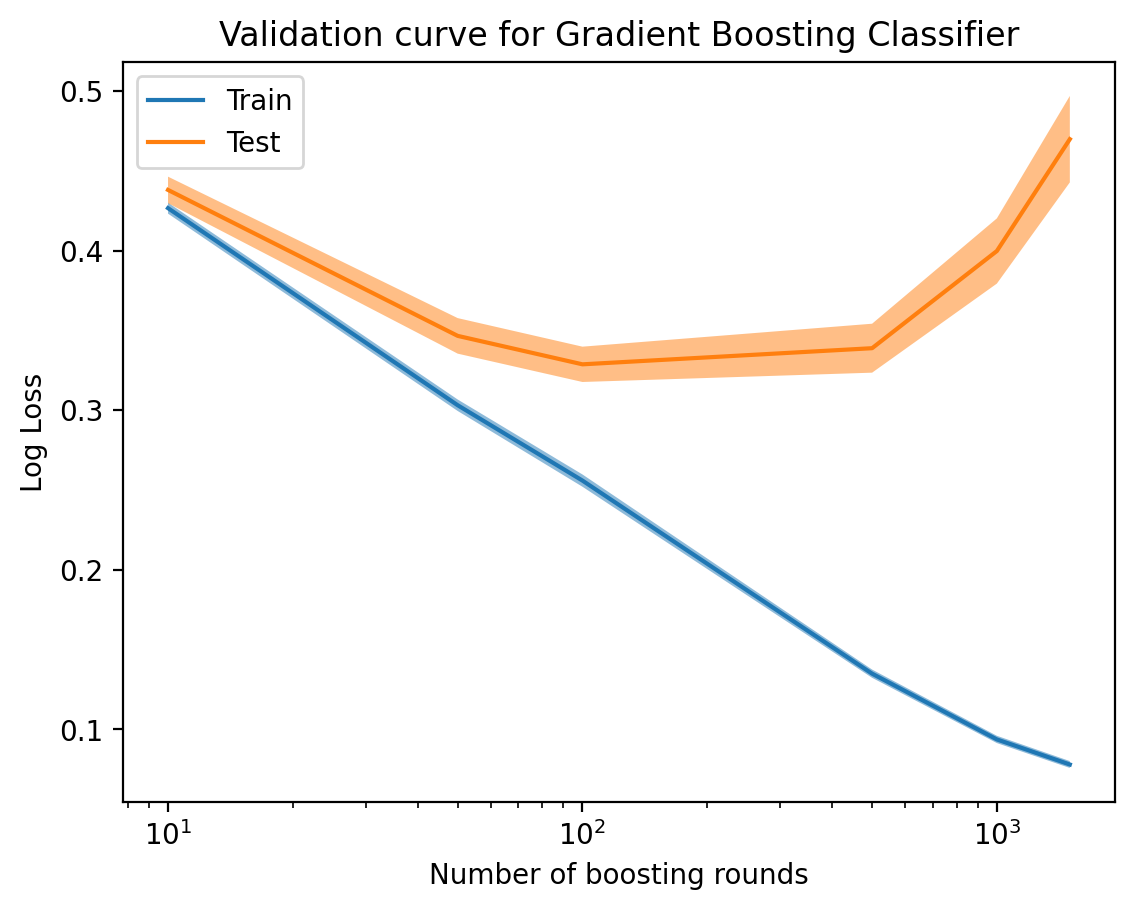

In [150]:
%%time
import numpy as np
from sklearn.model_selection import ValidationCurveDisplay

max_iter = np.array([10, 50, 100, 500, 1000, 1500])
disp = ValidationCurveDisplay.from_estimator(
    model,
    data,
    target,
    param_name="classifier__max_iter",
    param_range=max_iter,
    cv=cv,
    scoring="neg_log_loss", # accuracy
    negate_score=True,
    # std_display_style="errorbar",
    n_jobs=2,
)
_ = disp.ax_.set(
    xlabel="Number of boosting rounds",
    ylabel="Log Loss",
    title="Validation curve for Gradient Boosting Classifier",
)

In [157]:
# From Effect of the sample size in cross-validation
train_sizes = np.linspace(0.1, 1.0, num=5, endpoint=True)
print(train_sizes)

[0.1   0.325 0.55  0.775 1.   ]


CPU times: user 376 ms, sys: 97.4 ms, total: 474 ms
Wall time: 2min 15s


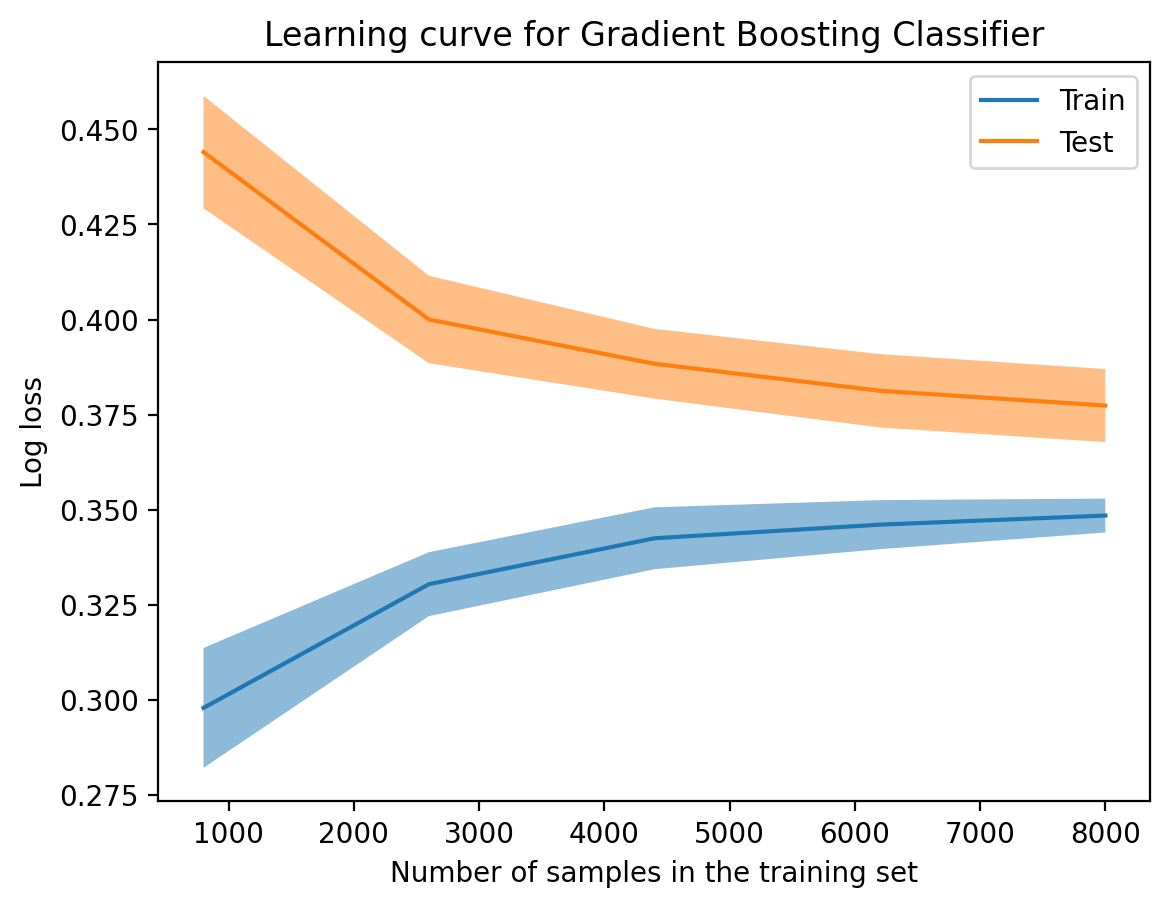

In [133]:
%%time
from sklearn.model_selection import LearningCurveDisplay

display = LearningCurveDisplay.from_estimator(
    model,
    data,
    target,
    train_sizes=train_sizes,
    cv=cv,
    score_type="both",  # both train and test errors
    scoring='neg_log_loss',
    negate_score=True,
    n_jobs=2,
)
_ = display.ax_.set(title="Learning curve for Gradient Boosting Classifier")

In [104]:
# model.get_params().keys()

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, train_size=0.2, random_state=42
)

In [161]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
    "classifier__learning_rate": (0.01, 0.1, 1, 10),
    "classifier__max_leaf_nodes": (3, 10, 30),
    "classifier__max_depth": (2, 5, 10),
    "classifier__max_iter": (10, 50, 100, 500),
      
}
model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=2, cv=5)
model_grid_search.fit(data_train, target_train)

accuracy = model_grid_search.score(data_test, target_test)
print(
    f"The test accuracy score of the grid-searched pipeline is: {accuracy:.2f}"
)

The test accuracy score of the grid-searched pipeline is: 0.82
CPU times: user 8.46 s, sys: 4.94 s, total: 13.4 s
Wall time: 1min 19s


In [163]:
from pprint import pprint
print("The best parameters are:")
pprint(model_grid_search.best_params_)

The best parameters are:
{'classifier__learning_rate': 0.01,
 'classifier__max_depth': 5,
 'classifier__max_iter': 500,
 'classifier__max_leaf_nodes': 30}


In [164]:
# set parameters
model.set_params(**model_grid_search.best_params_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_preprocessor',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Married', 'Dependents',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area']),
                                                 ('num_preprocessor',
                                                  StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History'])])),
                ('classifier',
                 HistGradientBoostingClassifier(learning_rate=0.01, max_depth=5,
                                                max_iter=500, max_leaf_nodes=30,
                                                random_state=42))])

In [165]:
# get the parameter names
column_results = [f"param_{name}" for name in param_grid.keys()]
column_results += ["mean_test_score", "std_test_score", "rank_test_score"]

cv_results = pd.DataFrame(model_grid_search.cv_results_)
cv_results = cv_results[column_results].sort_values(
    "mean_test_score", ascending=False
)


def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name


cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,learning_rate,max_leaf_nodes,max_depth,max_iter,mean_test_score,std_test_score,rank_test_score
35,0.01,30,10,500,0.8270,0.013546,1
23,0.01,30,5,500,0.8270,0.009138,1
67,0.1,10,10,100,0.8270,0.011662,1
65,0.1,30,10,50,0.8265,0.014543,4
53,0.1,30,5,50,0.8250,0.010954,5
...,...,...,...,...,...,...,...
122,10,30,5,10,0.3285,0.062302,137
136,10,10,10,50,0.3185,0.047318,141
133,10,10,10,10,0.3185,0.047318,141
139,10,10,10,100,0.3185,0.047318,141


In [168]:
from sklearn.model_selection import cross_validate

# Shuffle split
cv = ShuffleSplit(n_splits=5, test_size=0.4)

# model without tuning
cv_result = cross_validate(
    model,
    data_test,
    target_test,
    cv=cv,
    scoring='balanced_accuracy'
)

scores = cv_result["test_score"]
print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

The mean cross-validation accuracy is: 0.741 ± 0.002


### Different imputing strategies

In [171]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# iterative_imputer = IterativeImputer(random_state=0)

all_preprocessors = [
    None,
    IterativeImputer(random_state=0),
    SimpleImputer(),
    KNNImputer(),
]

In [172]:
# Define a model
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", HistGradientBoostingClassifier(random_state=42)),
    ]
)


In [176]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "preprocessor": all_preprocessors,
    "classifier__max_depth": [2, 5, 10],
}

grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    scoring="balanced_accuracy",
    cv=10,
).fit(data[numerical_columns], target)

In [177]:
results = pd.DataFrame(grid_search.cv_results_).sort_values(
    by="rank_test_score", ascending=True
)
# convert the name of the preprocessor for later display
results["param_preprocessor"] = results["param_preprocessor"].apply(
    lambda x: x.__class__.__name__ if x is not None else "None"
)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_preprocessor,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
8,0.708744,0.091609,0.007573,0.005190,10,None,"{'classifier__max_depth': 10, 'preprocessor': ...",0.730313,0.763362,0.743448,0.725343,0.703006,0.742564,0.731639,0.742653,0.715559,0.723843,0.732173,0.016013,1
10,0.949797,0.182670,0.007276,0.002854,10,SimpleImputer,"{'classifier__max_depth': 10, 'preprocessor': ...",0.729907,0.762041,0.749129,0.724240,0.707853,0.741769,0.723753,0.745077,0.716572,0.717765,0.731811,0.016181,2
9,0.996750,0.103192,0.008297,0.003734,10,IterativeImputer,"{'classifier__max_depth': 10, 'preprocessor': ...",0.737356,0.751642,0.760848,0.718380,0.700583,0.736306,0.729613,0.742961,0.716175,0.719393,0.731326,0.017229,3
11,1.334097,0.281652,0.189220,0.084300,10,KNNImputer,"{'classifier__max_depth': 10, 'preprocessor': ...",0.729713,0.749308,0.756399,0.715034,0.712700,0.738025,0.718201,0.737896,0.720714,0.712918,0.729091,0.014929,4
5,0.684125,0.048036,0.006284,0.001050,5,IterativeImputer,"{'classifier__max_depth': 5, 'preprocessor': I...",0.718433,0.741820,0.735870,0.698249,0.698646,0.741551,0.719791,0.732216,0.705340,0.703801,0.719572,0.016579,5
4,0.394317,0.087632,0.006643,0.004220,5,None,"{'classifier__max_depth': 5, 'preprocessor': N...",0.716827,0.743230,0.728600,0.707545,0.695915,0.736486,0.716662,0.731818,0.709481,0.708558,0.719512,0.014215,6
6,0.386088,0.074826,0.008723,0.004380,5,SimpleImputer,"{'classifier__max_depth': 5, 'preprocessor': S...",0.722264,0.740807,0.733139,0.704814,0.689747,0.737499,0.713315,0.736973,0.711597,0.702390,0.719255,0.016645,7
7,0.763319,0.087177,0.124985,0.038674,5,KNNImputer,"{'classifier__max_depth': 5, 'preprocessor': K...",0.713296,0.737678,0.734152,0.704109,0.689747,0.736088,0.710187,0.728382,0.715739,0.702788,0.717217,0.015453,8
2,0.089194,0.014074,0.005416,0.001526,2,SimpleImputer,"{'classifier__max_depth': 2, 'preprocessor': S...",0.709485,0.724419,0.708866,0.692171,0.674373,0.716444,0.690363,0.715521,0.694902,0.683272,0.700982,0.015438,9
1,0.393889,0.079614,0.005474,0.001192,2,IterativeImputer,"{'classifier__max_depth': 2, 'preprocessor': I...",0.708778,0.723009,0.711905,0.688029,0.674681,0.713315,0.696223,0.715828,0.697633,0.679836,0.700924,0.015422,10


In [235]:
data_test.iloc[:, -3:].drop(columns='Property_Area')

,Loan_Amount_Term,Credit_History
6252,360.0,1.0
4684,180.0,1.0
1731,180.0,1.0
4742,360.0,0.0
4521,360.0,1.0
...,...,...
1638,360.0,1.0
5891,360.0,1.0
7427,360.0,0.0
608,360.0,1.0


In [185]:
results[:3] #['param_preprocessor']

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_preprocessor,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
8,0.708744,0.091609,0.007573,0.005190,10,None,"{'classifier__max_depth': 10, 'preprocessor': ...",0.730313,0.763362,0.743448,0.725343,0.703006,0.742564,0.731639,0.742653,0.715559,0.723843,0.732173,0.016013,1
10,0.949797,0.182670,0.007276,0.002854,10,SimpleImputer,"{'classifier__max_depth': 10, 'preprocessor': ...",0.729907,0.762041,0.749129,0.724240,0.707853,0.741769,0.723753,0.745077,0.716572,0.717765,0.731811,0.016181,2
9,0.996750,0.103192,0.008297,0.003734,10,IterativeImputer,"{'classifier__max_depth': 10, 'preprocessor': ...",0.737356,0.751642,0.760848,0.718380,0.700583,0.736306,0.729613,0.742961,0.716175,0.719393,0.731326,0.017229,3


### DecisionBoundaryDisplay

In [190]:
model.fit(data_train, target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_preprocessor',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Married', 'Dependents',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area']),
                                                 ('num_preprocessor',
                                                  StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History'])])),
                ('classifier',
                 HistGradientBoostingClassifier(random_state=42))])

In [254]:
data_train

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
399,Yes,3+,Not Graduate,Yes,3850,983.0,100.0,480.0,1.0,Semiurban
7247,No,0,Not Graduate,No,2769,0.0,66.0,300.0,NaN,Urban
6406,No,0,Graduate,No,2500,0.0,80.0,360.0,1.0,Rural
882,Yes,2,Not Graduate,No,4735,0.0,72.0,360.0,1.0,Rural
3565,Yes,0,Graduate,Yes,6000,2250.0,265.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...
5734,Yes,1,Not Graduate,Yes,5285,1430.0,161.0,360.0,0.0,Semiurban
5191,Yes,0,Graduate,Yes,20833,5266.0,258.0,360.0,NaN,Rural
5390,No,0,Not Graduate,Yes,3358,2785.0,96.0,360.0,1.0,Semiurban
860,No,0,Graduate,Yes,3750,0.0,113.0,360.0,1.0,Urban


In [261]:
data_train_num = data_train[['ApplicantIncome', 'Credit_History']].copy()
data_test_num = data_test[['ApplicantIncome', 'Credit_History']].copy()

In [262]:
from sklearn.linear_model import LogisticRegression
numeric_preprocessor = Pipeline(
    steps=[
        ("imputer", iterative_imputer),
        (
            "scaler",
            StandardScaler(),
        ),
    ]
)
# Define a model
lr_model = Pipeline(
    steps=[
        ("preprocessor", numeric_preprocessor),
        ("classifier", LogisticRegression()),
    ]
)

lr_model.fit(data_train_num, target_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', IterativeImputer(random_state=0)),
                                 ('scaler', StandardScaler())])),
                ('classifier', LogisticRegression())])

Since we are dealing with a classification problem containing only 2 features,
it is then possible to observe the decision function boundary. The boundary is
the rule used by our predictive model to affect a class label given the
feature values of the sample.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p>Here, we use the class <tt class="docutils literal">DecisionBoundaryDisplay</tt>. This educational tool allows
us to gain some insights by plotting the decision function boundary learned by
the classifier in a 2 dimensional feature space.</p>
<p class="last">Notice however that in more realistic machine learning contexts, one would
typically fit on more than two features at once and therefore it would not be
possible to display such a visualization of the decision boundary in
general.</p>
</div>

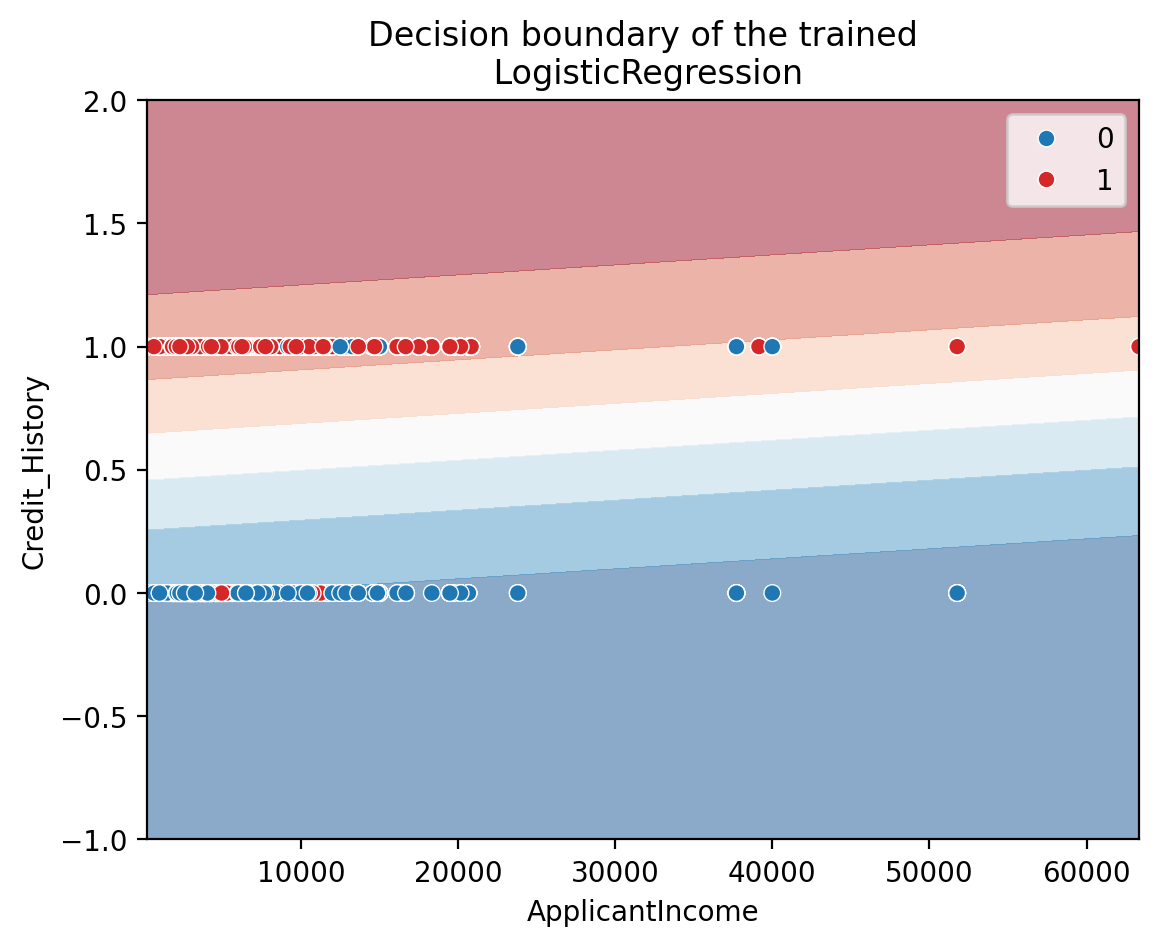

In [279]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    lr_model,
    data_test_num,
    response_method="predict_proba", # "predict"
    cmap="RdBu_r",
    alpha=0.5,
)
sns.scatterplot(
    data=data_test_num,
    x=data_test_num.columns[0],
    y=data_test_num.columns[1],
    hue=target_test,
    palette=["tab:blue", "tab:red"],
)
_ = plt.title("Decision boundary of the trained\n LogisticRegression")

In [280]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], normalize=True)

Loan_Status,N,Y
Credit_History,,
0.0,0.128769,0.017307
1.0,0.170676,0.683248


### MSE

In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse_sklearn

y = np.array([0, 1, 2, 3])
y_pred_ravel = np.array([0, 2, 4, 6])
y_pred_unravel = np.array([[0], [2], [4], [6]])

def mse_manual(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

mse_sklearn_ravel = mse_sklearn(y, y_pred_ravel)
mse_sklearn_unravel = mse_sklearn(y, y_pred_unravel)
mse_manual_ravel = mse_manual(y, y_pred_ravel)
mse_manual_unravel = mse_manual(y, y_pred_unravel)

print("sklearn implementation:")
print(mse_sklearn_ravel, mse_sklearn_unravel)
print("manual implementation:")
print(mse_manual_ravel, mse_manual_unravel)

sklearn implementation:
3.5 3.5
manual implementation:
3.5 8.5


### Get a snapshot of Penguin data

In [57]:
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn

# torch loss
mse_loss = nn.MSELoss()

# custom function
def mse_custom(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

# input data
data_unraveled = np.array(
    [[181.],
     [186.],
     [195.],
     [193.],
     [190.],
     [181.],
     [195.],
     [193.],
     [190.],
     [186.],
     [180.],
     [182.],
     [191.],
     [198.],
     [185.],
     [195.]
    ]
)

data_raveled = data_unraveled.ravel()

# target data
target = np.array([3750., 3800., 3250., 3450., 3650., 3625., 4675., 3475., 4250.,
       3300., 3700., 3200., 3800., 4400., 3700., 3450.])

# manual linear function
prediction_manual_unraveled = (-3000 + 45 * data_unraveled)
prediction_manual_raveled = (-3000 + 45 * data_raveled)

print('1. Results with unraveled inputs')
print(f"Scikit-Learn: {mean_squared_error(target, prediction_manual_unraveled)}\n"
      f"Custom: {mse_custom(target, prediction_manual_unraveled)}\n"
      f"PyTorch: {mse_loss(torch.from_numpy(target), torch.from_numpy(prediction_manual_unraveled))}"
)
# print('2. Results with raveled inputs')
# print(f"Scikit-Learn: {mean_squared_error(target, prediction_manual_raveled)}\n"
#       f"Custom: {mse_custom(target, prediction_manual_raveled)}\n"
#       f"PyTorch: {mse_loss(torch.from_numpy(target), torch.from_numpy(prediction_manual_raveled))}"
# )

1. Results with unraveled inputs
Scikit-Learn: 3327478.125
Custom: 3391611.9140625
PyTorch: 3391611.9140625


/Users/deburky/Library/Caches/pypoetry/virtualenvs/machine-learning-in-python-with-scikit-lea-trXpJzdr-py3.10/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
